<h1 style="color:#B22222">Deciphering Wine Quality: An Analytical Journey into the Characteristics of Red Wine</h1>

*To explore a more visually oriented representation of my wine data analysis, feel free to click [this link](https://public.tableau.com/app/profile/miles.stripling/viz/Wine_16909888397030/Story1) to view the Tableau visualization*

Red wine, an elegant beverage appreciated for its rich flavors and historical significance, has been a staple at dining tables, celebrations, and gatherings for centuries. Behind every bottle lies an intricate blend of taste, aroma, and attributes that determine its quality. How can we draw the line between a regular wine and an exquisite one just from its features?

Having tasted and brewed a variety of wines over the years, my fascination with understanding the subtleties of this luxurious drink has only grown. My thirst for knowledge led me to discover a captivating dataset revolving around the attributes of red wine. At a mere glance, I perceived an opportunity: to unravel the mysteries of wine quality and to venture into a domain where science meets sensory pleasure.

In this exploration, I aim to:

* Identify the key attributes that play a pivotal role in determining wine quality.
* Understand the interplay between various characteristics like acidity, alcohol content, and residual sugar.
* Investigate if certain attributes influence quality more prominently than others.
* ... and so much more.

Join me as we navigate this dataset, unearthing patterns, anomalies, and illuminating insights that could provide a deeper appreciation of the complexities of red wine.

Let's uncork this analytical endeavor!

## Let's Connect

I'm always eager to take on new challenges and to collaborate with fellow data enthusiasts. Whether you're a recruiter looking for talent, a peer wanting to collaborate, or just someone curious about data, I'd love to connect.
  

  [LinkedIn](https://www.linkedin.com/in/miles-stripling)
  
  [Tableau](https://public.tableau.com/app/profile/miles.stripling?authMode=activationSuccess)



-----

<span style="color:green">Import Libraries</span> 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

## Examine database structure and get a baseline

In [2]:
df = pd.read_csv('wine.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<h2 style="color:#B22222">Step I: Identifying and Visualizing Outliers</h2>

Outliers, in statistical terms, are values that lie at an abnormal distance from other values in a dataset. Their presence can skew our analysis and potentially lead to misleading conclusions. Especially in a dataset like ours, centered around wine attributes and quality, it's crucial to ascertain whether any outliers exist and how they might influence our overall findings.

For this purpose, I've employed the Interquartile Range (IQR) method. Here's a step-by-step breakdown:

* **Determine the Quartiles:** The dataset is split into quartiles to get an understanding of the distribution of data. The quartiles split the data into four equal parts:
        Q1 (25th percentile)
        Q2 (50th percentile or median)
        Q3 (75th percentile)

* **Calculate the IQR:** This represents the range between the first and third quartiles (Q3-Q1). It's a measure of statistical spread, essentially the range where the bulk of the values lie.

* **Establish Outlier Bounds:** Using the IQR, we can define what we consider to be outliers:
        Any value below Q1−1.5×IQRQ1−1.5×IQR is a lower outlier.
        Any value above Q3+1.5×IQRQ3+1.5×IQR is an upper outlier.

* **Extract Outliers:** With the bounds defined, we then extract all data points considered outliers for further examination.

* **Visualize with Boxplots:** To better understand the influence of these outliers, I plotted two boxplots:
        The first plot showcases the entire dataset, outliers included.
        The second plot presents a cleaned version, with the outliers removed, offering a clearer view of the data's central tendencies and spreads.

Let's discern the impact of these outliers on our dataset.

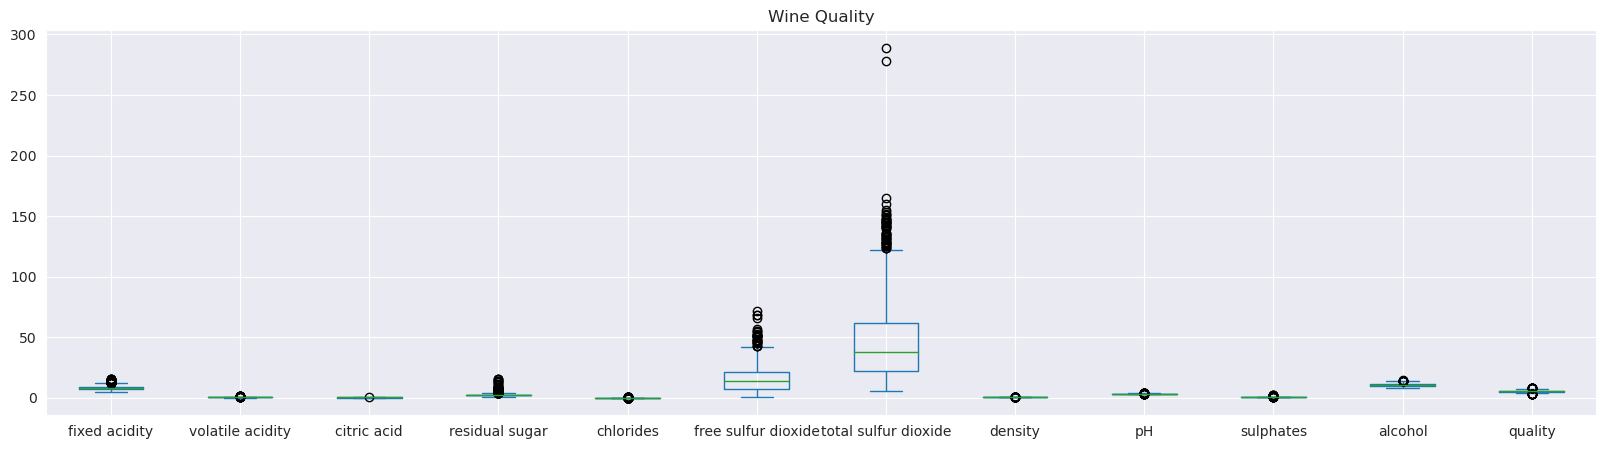

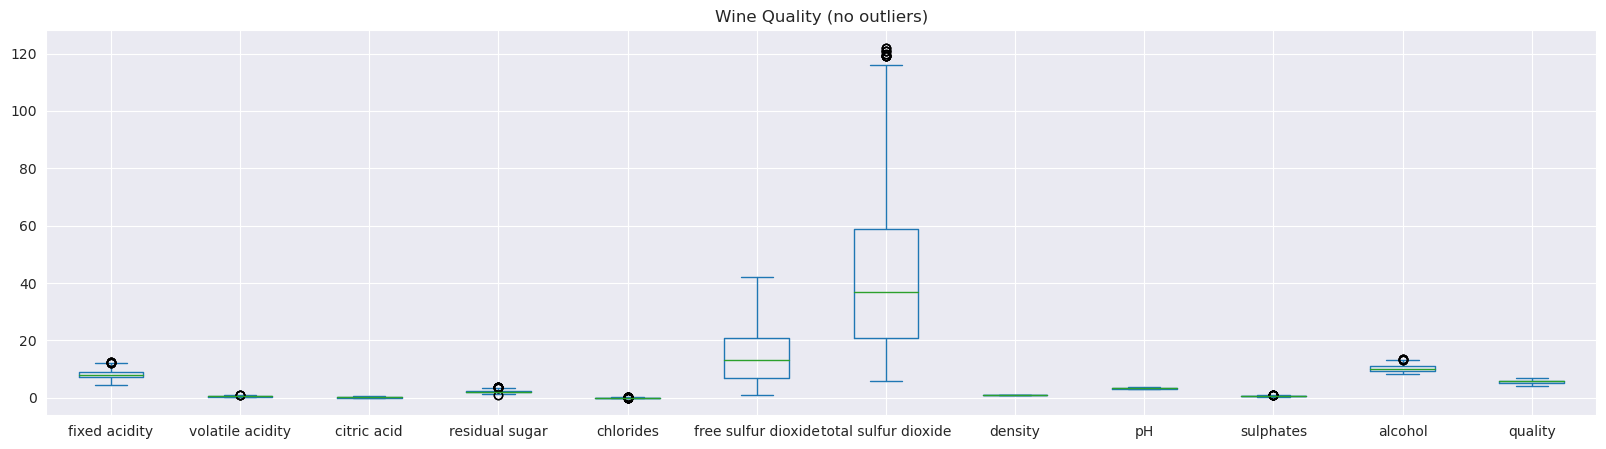

In [3]:
q1 = df.quantile(.25, axis=0, numeric_only=True)
q2 = df.quantile(.5, axis=0, numeric_only=True)
q3 = df.quantile(.75, axis=0, numeric_only=True)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outliers = df[(df > upper)|(df < lower).any(axis=1)]

df.plot(kind='box').set_title('Wine Quality')
df_clean = df[~((df < lower)|(df > upper))]
df_clean.plot(kind='box').set_title('Wine Quality (no outliers)')
plt.show()

<h2 style="color:#B22222">Step II: Dissecting Quality - The Median Split</h2>

Understanding the intricate dance of attributes that contribute to wine quality is paramount. Given the evident impact of outliers on our dataset, as observed from our previous analysis, it's essential to delve deeper into how these outliers might be influencing our perception of 'better' versus 'worse' wines.

Here's the essence of our exploration:

* **Determine the Median Quality:**
    The median serves as a robust measure of central tendency, less susceptible to the influence of outliers than the mean. By splitting the wines based on this metric, we can categorize them into two groups:
        Better Wines: Those with quality above or equal to the median.
        Worse Wines: Those below the median.

* **Segment the Wines:**
    With the median quality as our benchmark, we extract wines that fall into both the 'better' and 'worse' categories, for both the raw and cleaned datasets. This gives us an opportunity to see if the outliers predominantly belong to a specific quality range.

* **Visual Representation using Boxplots:**
    Visualization is a powerful tool for comparative analysis. Using boxplots, we've charted:
        Better Wines Distribution: Both with and without the influence of outliers.
        Worse Wines Distribution: Similarly with and without outliers.

This segmented view allows for a clearer understanding of how various attributes fluctuate across these quality distinctions and whether the outliers have a preferential presence in one group over the other.

Let's examine the visuals and understand where the heart of our wine quality lies, especially in terms of its intrinsic attributes.

Median Wine Quality: 6.0


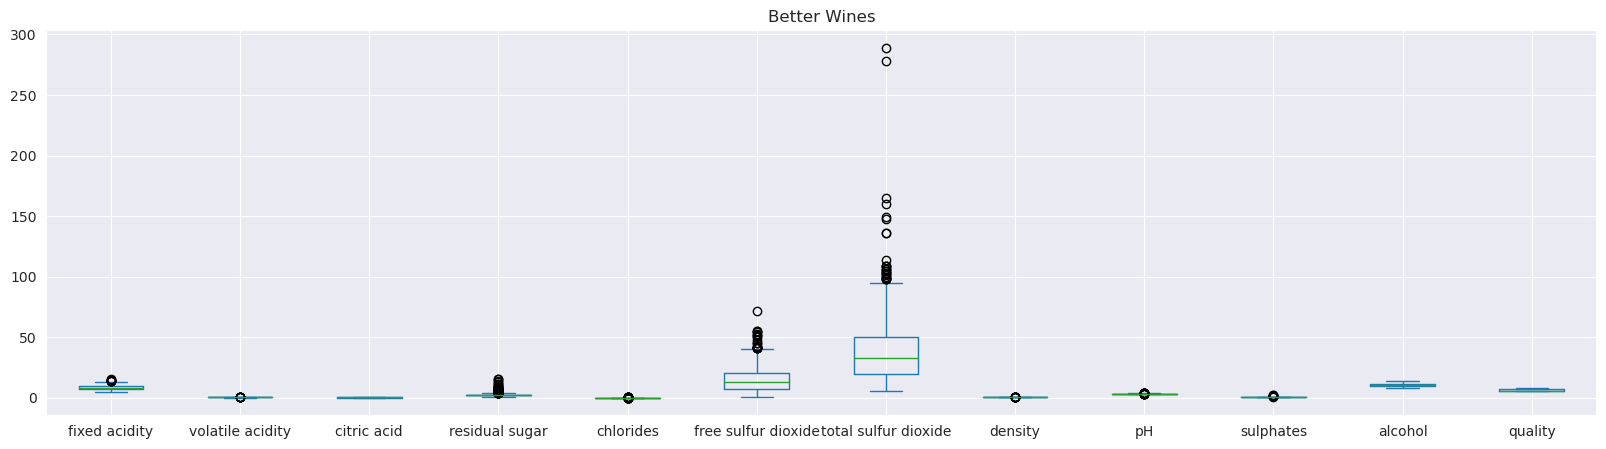

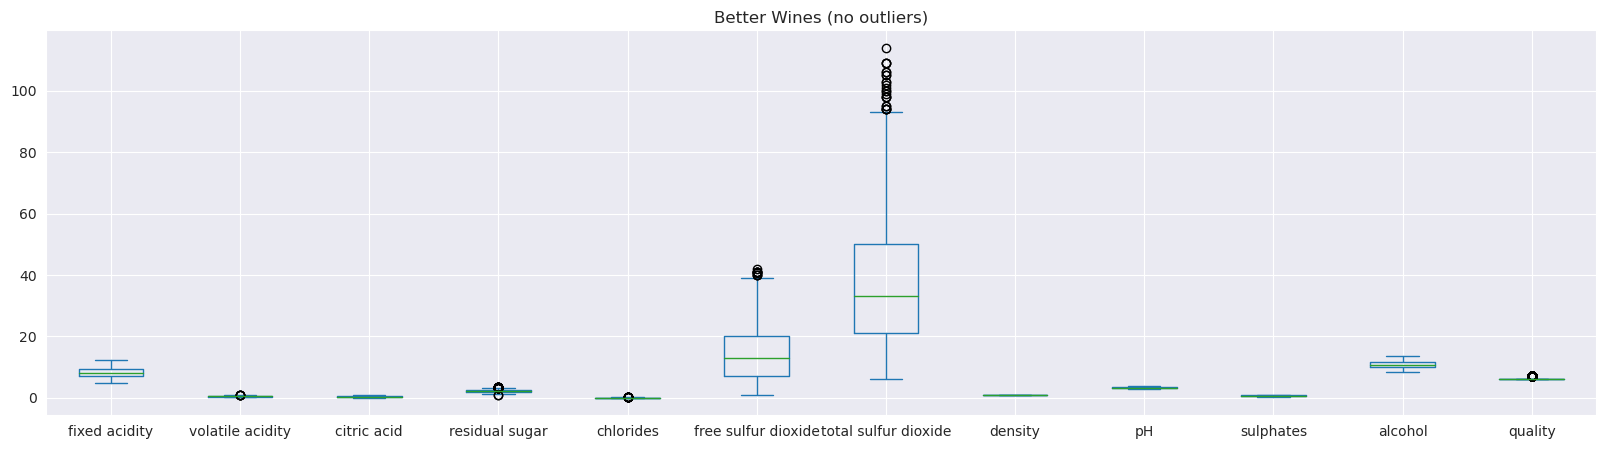

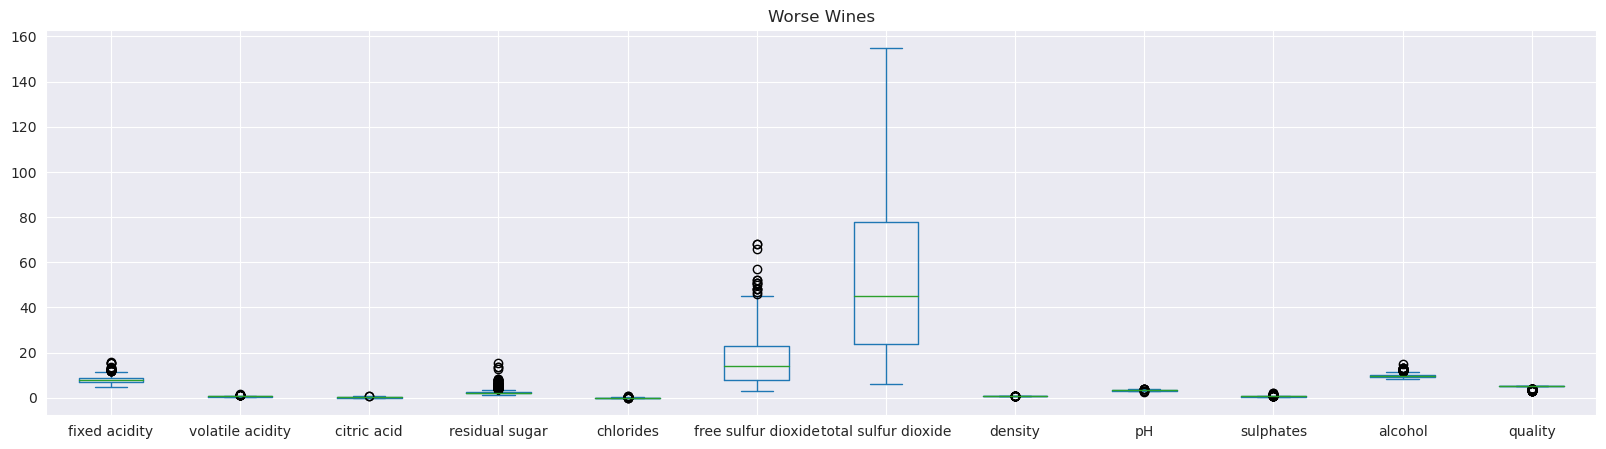

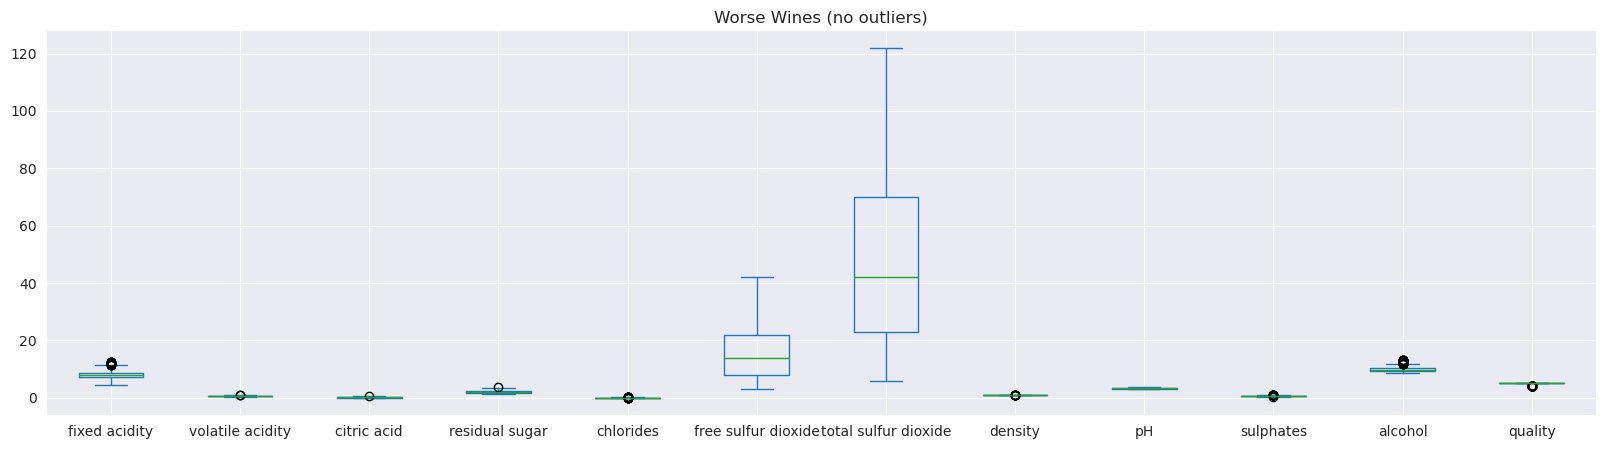

In [4]:
quality_median = df.quality.median()
quality_median_clean = df_clean.quality.median()

better = df[df['quality'] >= quality_median]
better_clean = df_clean[df_clean['quality'] >= quality_median_clean]

worse = df[df['quality'] < quality_median]
worse_clean = df_clean[df_clean['quality'] < quality_median_clean]

better.plot(kind='box').set_title('Better Wines')
better_clean.plot(kind='box').set_title('Better Wines (no outliers)')

worse.plot(kind='box').set_title('Worse Wines')
worse_clean.plot(kind='box').set_title('Worse Wines (no outliers)')
# df.plot(kind='box').set_title('all')

print(f'Median Wine Quality: {quality_median}')

<h2 style="color:#B22222">Step III: Analyzing Mean Values Across Quality Tiers</h2>

A fundamental approach to understanding a dataset is by examining its mean values. Mean values provide an average representation, giving a snapshot of the typical behavior of data points within a given segment. With wines, understanding how these average values fluctuate across 'better' and 'worse' tiers can lend insights into the characteristics that set apart higher-quality wines from their lesser counterparts.

In this section, we venture into:

*    **Selecting Key Columns:**
    For our analysis, we've chosen the columns: 'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', and 'alcohol'. These are potentially significant attributes that might be influential in determining wine quality.

*    **Calculating Mean Values:**
    Based on our previous quality segmentation:
        * All Wines: Mean values for wines that are exactly at the median quality.
        * Better Wines: Mean values for wines above the median quality.
        * Better Wines (no outliers): A cleaned-up version, excluding outlier influence.
        * Worse Wines: Mean values for wines below the median quality.
        * Worse Wines (no outliers): Again, a version sans outliers.

*    **Visual Representation with Bar Graphs:**
    Utilizing bar graphs, we can effectively compare the mean values across our selected columns for each segment. This visual approach makes it easier to identify any standout characteristics or notable differences between quality tiers.

The plotted bars offer a comparative insight, allowing us to identify which attributes might be pivotal in differentiating wine quality.

Let's dive into the visual representation to see what stories the mean values have to tell us about the intrinsic nature of our wines.

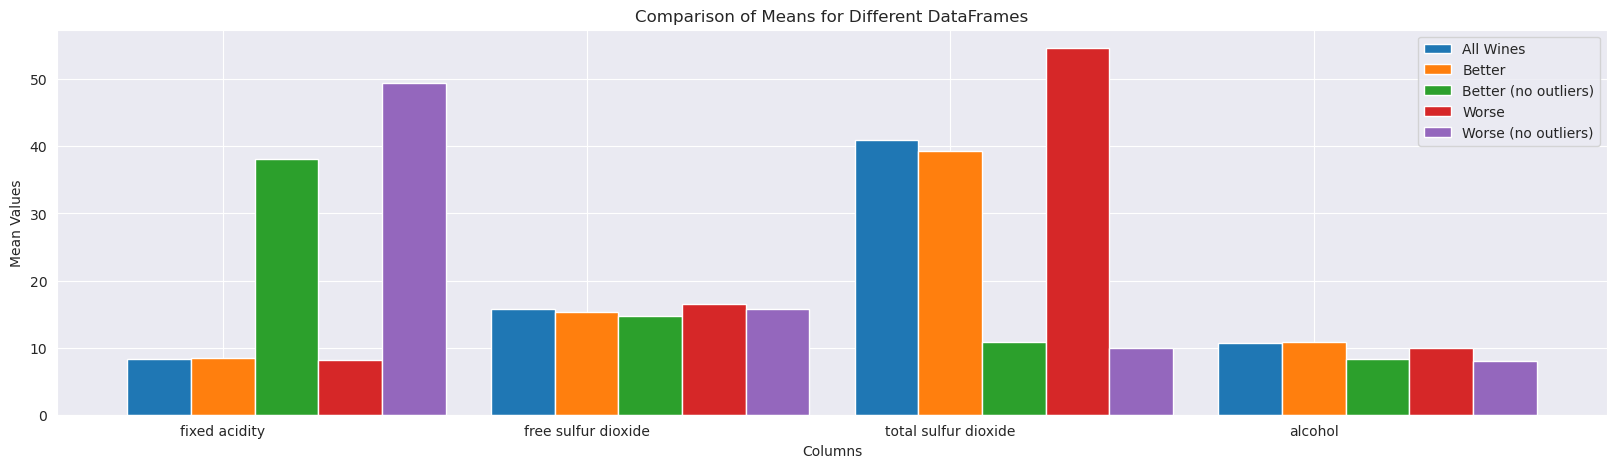

In [8]:
columns = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
qual_med = df.quality.median()
# Calculate the means for each DataFrame and specified columns
means_qual_med = df.loc[df['quality'] == qual_med, columns].mean()
#means_best = best[columns].mean()
means_better = better[columns].mean()
means_worse = worse[columns].mean()
means_better_clean = better_clean[columns].mean().sort_values(ascending=False)
means_worse_clean = worse_clean[columns].mean().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(columns))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, means_qual_med, width=bar_width, label='All Wines' plt.bar(x, means_better, width=bar_width, label='Better')
plt.bar(x + bar_width, means_better_clean, width=bar_width, label='Better (no outliers)')
plt.bar(x + 2 * bar_width, means_worse, width=bar_width, label='Worse')
plt.bar(x + 3 * bar_width, means_worse_clean, width=bar_width,label='Worse (no outliers)')

# Set the labels for the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('Mean Values')

# Set the title of the graph
plt.title('Comparison of Means for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, columns)

# Add a legend
plt.legend()

# Show the plot
plt.show()


<h2 style="color:#B22222">Step IV: Delving into Secondary Attributes</h2>

While the primary attributes of wines, like 'fixed acidity' and 'alcohol', are undeniably significant, it's the intricate balance of secondary attributes that often refines the taste, aroma, and overall appeal of a wine. Attributes such as 'volatile acidity', 'citric acid', and 'chlorides', among others, play a pivotal role in defining the subtleties of a wine's character.

To ensure a comprehensive analysis, let's turn our focus to these secondary attributes:

*    **Highlighting Secondary Columns:**
    Our chosen attributes for this phase include 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', and 'sulphates'.

*    **Computing Mean Values:**
    Using our earlier segmentation by quality:
        * All Wines: Average values for wines that match the median quality.
        * Better Wines: Averages for wines above the median quality mark.
        * Better Wines (no outliers): The outlier-free version of the aforementioned segment.
        * Worse Wines: Averages for wines below the median quality.
        * Worse Wines (no outliers): This segment's outlier-free version.

*    **Visualization Using Bar Graphs:**
    Employing bar graphs, we compare the mean values of our secondary attributes across each wine segment. Such a visual representation aids in discerning patterns or deviations that might be less apparent in raw numbers.

With these bars charted side-by-side, we aim to identify if certain secondary attributes are more prominent in higher-quality wines and if the elimination of outliers leads to any drastic shifts in these average values.

Let's inspect the visualization to unravel the nuanced stories these secondary attributes might be narrating about wine quality.

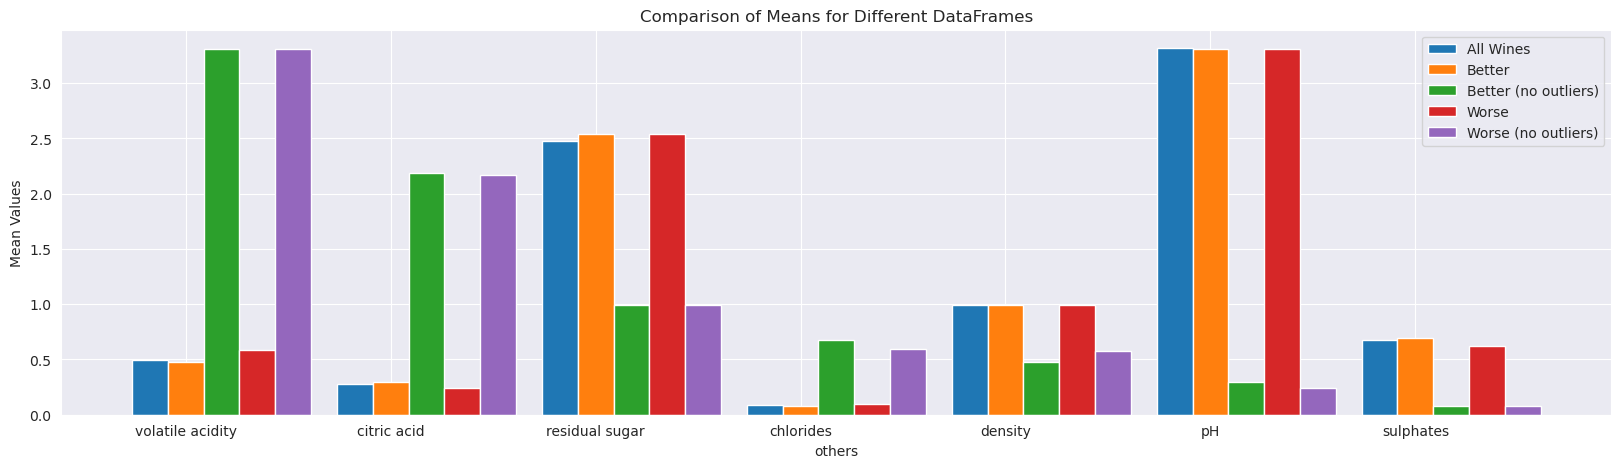

In [5]:
others = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

# Calculate the means for each DataFrame and specified others
means_qual_med = df.loc[df['quality'] == qual_med, others].mean()
#$means_best = best[others].mean()
means_better = better[others].mean()
means_worse = worse[others].mean()
means_better_clean = better_clean[others].mean().sort_values(ascending=False)
means_worse_clean = worse_clean[others].mean().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(others))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, means_qual_med, width=bar_width, label='All Wines')
plt.bar(x, means_better, width=bar_width, label='Better')
plt.bar(x + bar_width, means_better_clean, width=bar_width, label='Better (no outliers)')
plt.bar(x + 2 * bar_width, means_worse, width=bar_width, label='Worse')
plt.bar(x + 3 * bar_width, means_worse_clean, width=bar_width,label='Worse (no outliers)')

# Set the labels for the x-axis and y-axis
plt.xlabel('others')
plt.ylabel('Mean Values')

# Set the title of the graph
plt.title('Comparison of Means for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, others)

# Add a legend
plt.legend()

# Show the plot
plt.show()


<h2 style="color:#B22222">Step IV Continued: Assessing Variability with Standard Deviation</h2>

Beyond averages, it's crucial to understand the variability or dispersion of data to gain deeper insights. The standard deviation serves as an excellent metric in this context, indicating how spread out the values are from their mean. A higher standard deviation can suggest a wider range of values, while a lower one points to more consistent data.

In continuation of our previous exploration into wine attributes:

*    **Revisiting the Primary Columns:**
    As before, we're focusing on the columns 'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', and 'alcohol'. While we previously analyzed their mean values, it's now time to delve into their variability.

*    **Computing Standard Deviations:**
    Based on our segmented categories:
        * All Wines: Standard deviation values for wines matching the median quality.
        * Better Wines: Standard deviations for wines surpassing the median quality.
        * Better Wines (no outliers): An analysis that omits the outliers from the 'Better' category.
        * Worse Wines: Standard deviations for wines below the median.
        * Worse Wines (no outliers): A version that negates the influence of outliers.

*    **Visualization with Bar Graphs:**
    As we chart the standard deviations, it helps us visualize the range and consistency of data across each attribute for the distinct quality tiers. This allows us to ask questions such as, "Do better wines have more consistent alcohol content?" or "Is there a broader range in total sulfur dioxide levels in worse wines?"

Interpreting these visual variations, we can extract valuable insights on whether certain attributes of higher-quality wines tend to be more consistent or variable compared to their lesser-rated counterparts.

Let's proceed to understand the spread and consistency of our selected wine attributes.

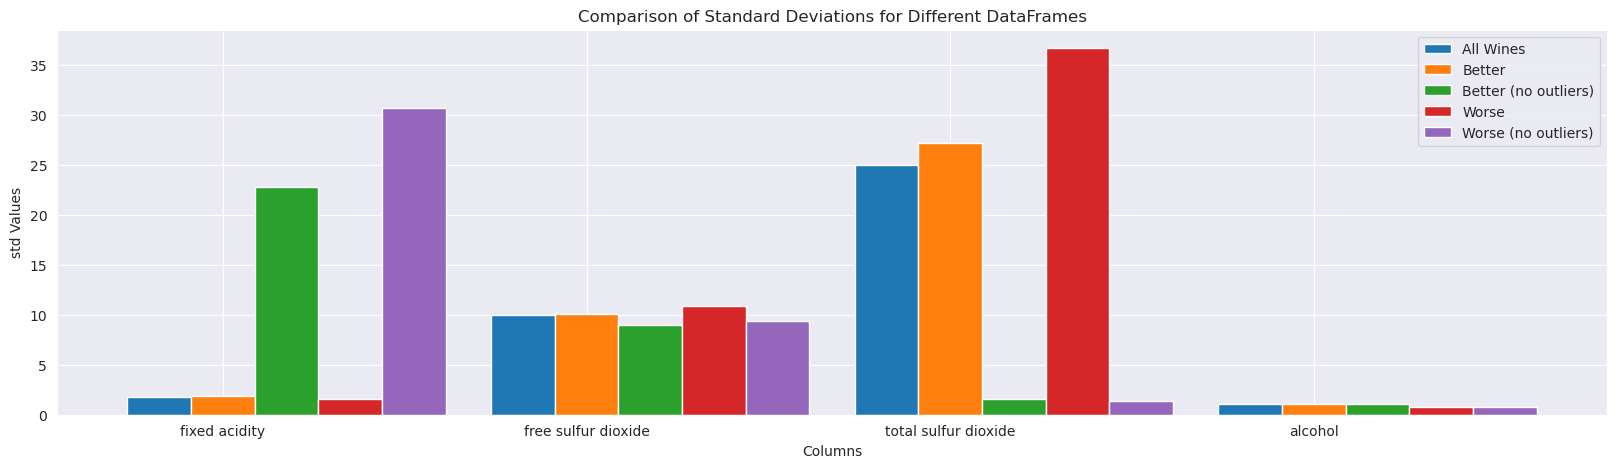

In [6]:
columns = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
qual_med = df.quality.median()
# Calculate the std for each DataFrame and specified columns
std_qual_med = df.loc[df['quality'] == qual_med, columns].std()
#std_best = best[columns].std()
std_better = better[columns].std()
std_worse = worse[columns].std()
std_better_clean = better_clean[columns].std().sort_values(ascending=False)
std_worse_clean = worse_clean[columns].std().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(columns))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, std_qual_med, width=bar_width, label='All Wines')
plt.bar(x, std_better, width=bar_width, label='Better')
plt.bar(x + bar_width, std_better_clean, width=bar_width, label='Better (no outliers)')
plt.bar(x + 2 * bar_width, std_worse, width=bar_width, label='Worse')
plt.bar(x + 3 * bar_width, std_worse_clean, width=bar_width,label='Worse (no outliers)')

# Set the labels for the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('std Values')

# Set the title of the graph
plt.title('Comparison of Standard Deviations for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, columns)

# Add a legend
plt.legend()

# Show the plot
plt.show()


<h2 style="color:#B22222">Step V: Expanding Variability Analysis to Other Wine Attributes</h2>

Having examined the primary columns, we extend our standard deviation analysis to other pivotal wine attributes. This continues our quest to unearth the degree of variability across different wine qualities.

Attributes under scrutiny in this segment:

*    **Volatile Acidity**
*    **Citric Acid**
*    **Residual Sugar**
*    **Chlorides**
*    **Density**
*    **pH**
*    **Sulphates**

Procedures and Significance:

*    **Deepening our Scope:**
    We're including these additional attributes to ensure a comprehensive study. Each one of these factors can have distinct impacts on wine quality, and hence, understanding their variability becomes quintessential.

*    **Computing Standard Deviations:**
    Similar to our previous approach:
        * All Wines: Variability in wines that match the median quality.
        * Better Wines: Spread for wines that stand above the median quality.
        * Better Wines (no outliers): Analysis that eliminates the influence of outliers from the 'Better' segment.
        * Worse Wines: Dispersion for wines that lie below the median quality.
        * Worse Wines (no outliers): Version that mitigates the influence of outliers.

*    **Visual Representation:**
    Utilizing bar graphs, we contrast the standard deviations, thereby showcasing the extent of spread for each attribute across the wine quality categories. This empowers us with insights such as, "Is the pH more stable in high-quality wines?" or "Does residual sugar demonstrate more variance in lesser-quality wines?"

Let's delve into the variability of these crucial wine characteristics and discern what patterns emerge.

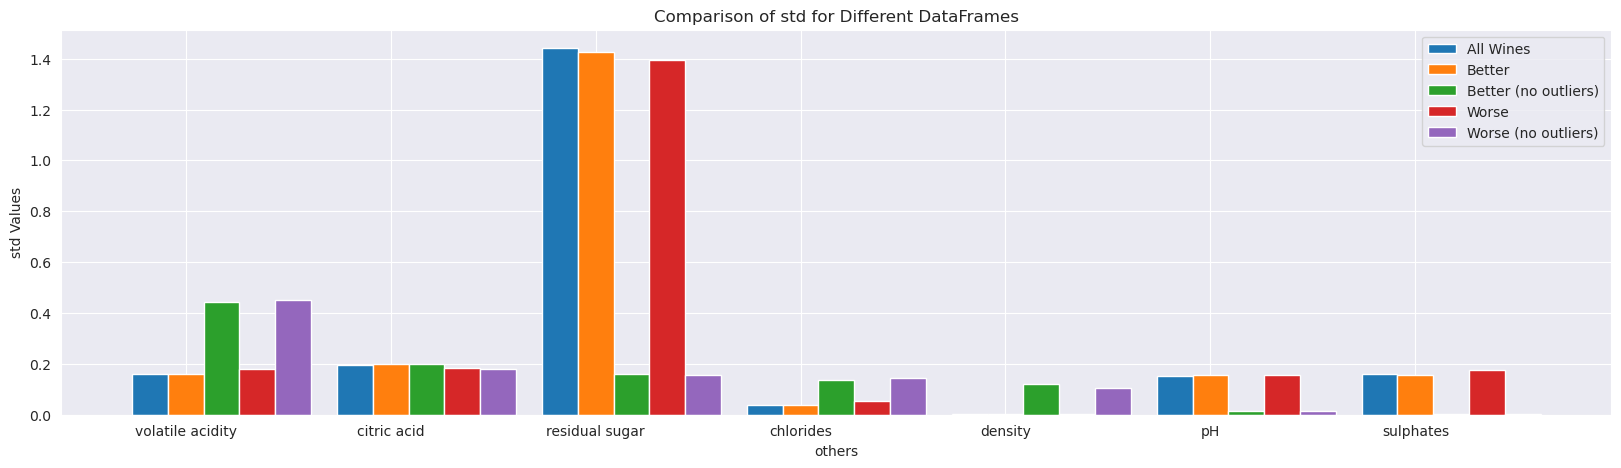

In [7]:
others = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

# Calculate the std for each DataFrame and specified others
std_qual_med = df.loc[df['quality'] == qual_med, others].std()
#$std_best = best[others].std()
std_better = better[others].std()
std_worse = worse[others].std()
std_better_clean = better_clean[others].std().sort_values(ascending=False)
std_worse_clean = worse_clean[others].std().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(others))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, std_qual_med, width=bar_width, label='All Wines')
plt.bar(x, std_better, width=bar_width, label='Better')
plt.bar(x + bar_width, std_better_clean, width=bar_width, label='Better (no outliers)')
plt.bar(x + 2 * bar_width, std_worse, width=bar_width, label='Worse')
plt.bar(x + 3 * bar_width, std_worse_clean, width=bar_width,label='Worse (no outliers)')

# Set the labels for the x-axis and y-axis
plt.xlabel('others')
plt.ylabel('std Values')

# Set the title of the graph
plt.title('Comparison of std for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, others)

# Add a legend
plt.legend()


# Show the plot
plt.show()


<h2 style="color:#B22222">Step VI: Evaluating Variance in Key Wine Parameters</h2>

As variance provides a square measure of dispersion, studying it can reveal how spread out our data is, especially in relation to the mean. In this step, our focus gravitates towards understanding the variance in some principal wine attributes.

Attributes dissected here include:

*    **Fixed Acidity**
*    **Free Sulfur Dioxide**
*    **Total Sulfur Dioxide**
*    **Alcohol**

Procedure and Insights:

*    **Determining Variance:**
    Using variance as a statistical tool, we're capturing the extent of spread or consistency in our wine data.
        * All Wines: Variance for wines with a quality equating the median.
        * Better Wines: Measure of spread for wines exceeding the median quality.
        * Better Wines (no outliers): This gives us an insight into the variance without the influence of outliers for wines with a quality superior to the median.
        * Worse Wines: Variance for wines falling short of the median quality.
        * Worse Wines (no outliers): A perspective that's devoid of the outliers' influence for wines of a quality below the median.

*    **Visualization of Results:**
    Bar charts assist us in contrasting the variance values across different wine qualities and attributes. By doing so, we can gauge attributes like "Does 'Free Sulfur Dioxide' exhibit more consistency in better-quality wines?", or "Is 'Alcohol' content more dispersed in worse wines?"

Let's dive deeper into the variance values to decipher how these attributes vary across wine qualities.

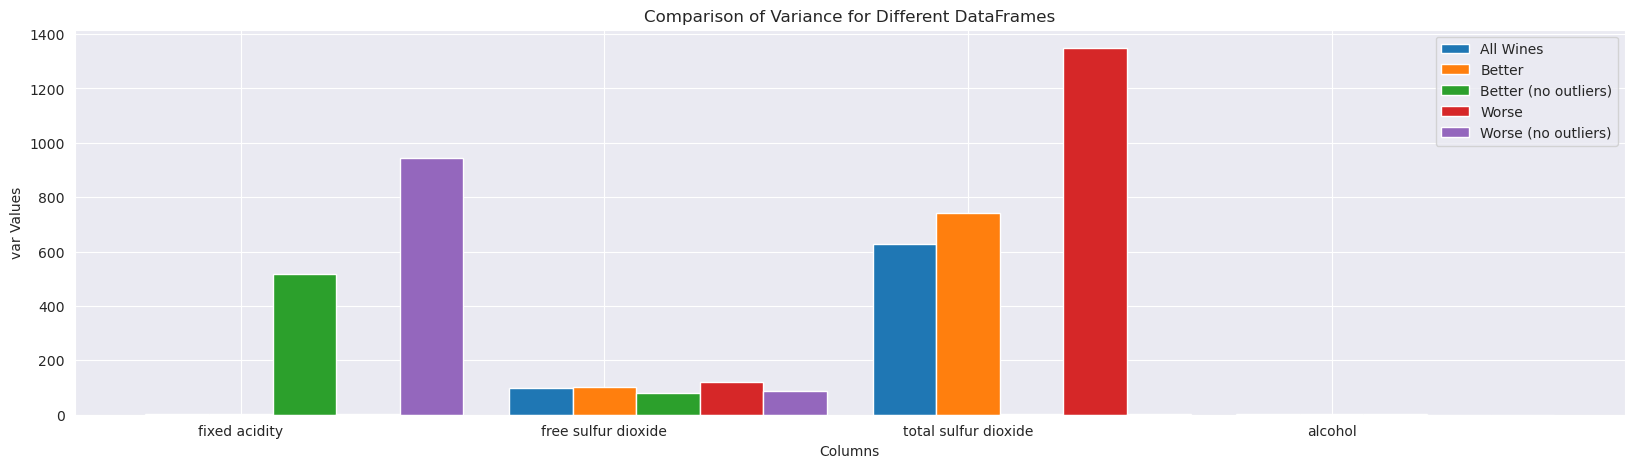

In [8]:
columns = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
qual_med = df.quality.median()
# Calculate the var for each DataFrame and specified columns
var_qual_med = df.loc[df['quality'] == qual_med, columns].var()
#var_best = best[columns].var()
var_better = better[columns].var()
var_worse = worse[columns].var()
var_better_clean = better_clean[columns].var().sort_values(ascending=False)
var_worse_clean = worse_clean[columns].var().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(columns))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, var_qual_med, width=bar_width, label='All Wines')
plt.bar(x, var_better, width=bar_width, label='Better')
plt.bar(x + bar_width, var_better_clean, width=bar_width, label='Better (no outliers)')
plt.bar(x + 2 * bar_width, var_worse, width=bar_width, label='Worse')
plt.bar(x + 3 * bar_width, var_worse_clean, width=bar_width,label='Worse (no outliers)')

# Set the labels for the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('var Values')

# Set the title of the graph
plt.title('Comparison of Variance for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, columns)

# Add a legend
plt.legend()

# Show the plot
plt.show()


<h2 style="color:#B22222">Step VI Continued: Diving into Variance of Additional Wine Attributes</h2>

To gain a broader understanding, let's now turn our attention to the variance in several other key wine attributes:

*    **Volatile Acidity**
*    **Citric Acid**
*    **Residual Sugar**
*    **Chlorides**
*    **Density**
*    **pH**
*    **Sulphates**

Procedure and Analysis:

*    **Calculating Variance:**
    We continue our endeavor to understand the extent of data spread across different wine qualities, but with a new set of attributes.
        * All Wines: This captures the variance of wines that match the median quality.
        * Better Wines: Focusing on wines that have a quality surpassing the median.
        * Better Wines (no outliers): Peeking into the variance, yet this time without the influence of outliers, for wines above the median.
        * Worse Wines: Understanding the spread for wines that didn't meet the median quality.
        * Worse Wines (no outliers): A perspective minus the outliers' effect, but for wines that are below the median in quality.

*    **Visual Representation:**
    As with the previous attributes, bar graphs are our go-to for visual representation. These plots offer a tangible comparison, allowing us to spot trends or outliers with ease. Questions that may arise could be along the lines of "Do worse wines generally exhibit higher variance in 'pH'?" or "Is the 'Density' more consistent among better wines?"

Let's chart these values to paint a clearer picture of how variance plays out across different wine qualities and these particular attributes.

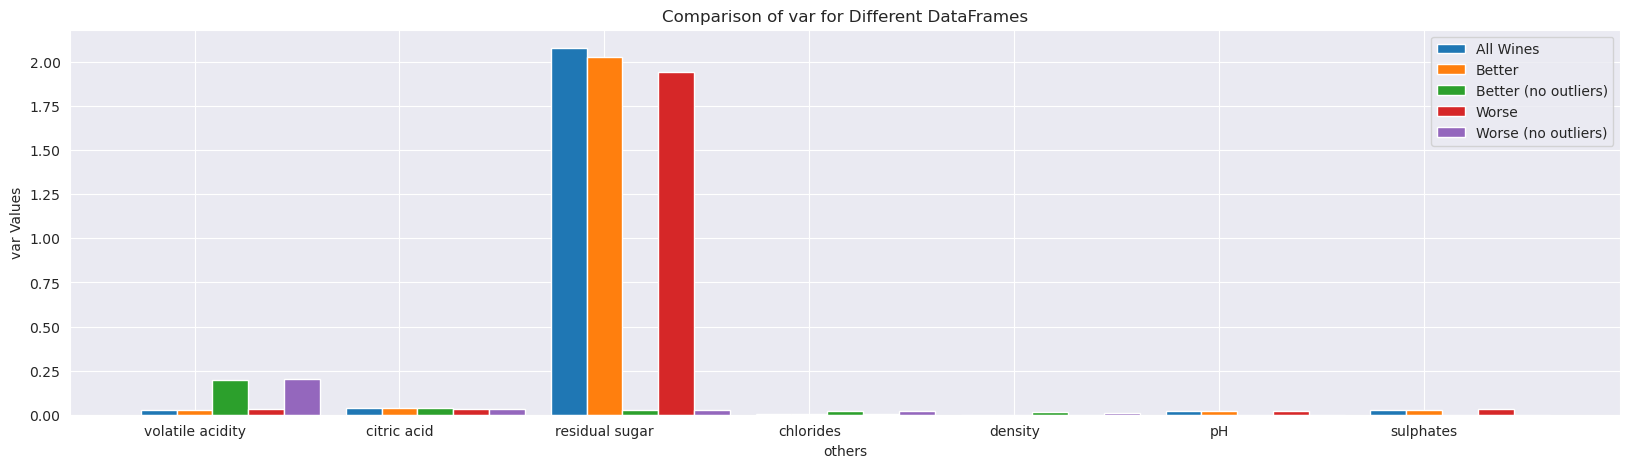

In [9]:
others = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

# Calculate the var for each DataFrame and specified others
var_qual_med = df.loc[df['quality'] == qual_med, others].var()
#$var_best = best[others].var()
var_better = better[others].var()
var_worse = worse[others].var()
var_better_clean = better_clean[others].var().sort_values(ascending=False)
var_worse_clean = worse_clean[others].var().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(others))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, var_qual_med, width=bar_width, label='All Wines')
plt.bar(x, var_better, width=bar_width, label='Better')
plt.bar(x + bar_width, var_better_clean, width=bar_width, label='Better (no outliers)')
plt.bar(x + 2 * bar_width, var_worse, width=bar_width, label='Worse')
plt.bar(x + 3 * bar_width, var_worse_clean, width=bar_width,label='Worse (no outliers)')

# Set the labels for the x-axis and y-axis
plt.xlabel('others')
plt.ylabel('var Values')

# Set the title of the graph
plt.title('Comparison of var for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, others)

# Add a legend
plt.legend()


# Show the plot
plt.show()


<h2 style="color:#B22222">Step VII: Correlation Analysis of Wine Attributes</h2>

Understanding correlation between different wine attributes can provide deep insights into how these variables interact and influence each other. It can also offer a basis for subsequent exploratory or predictive modeling.

Procedure and Analysis:

*    **Computing Correlation Matrices:**
    To start with, we generate correlation matrices for various groups of wines:
        * All Wines: This captures the inter-attribute correlations for all wines in the dataset.
        * Better Wines: Focusing on wines that surpass the median quality.
        * Better Wines (no outliers): Insights without the influence of outliers for wines above the median quality.
        * Worse Wines: Correlation analysis for wines below the median quality.
        * Worse Wines (no outliers): Analyzing correlations, but without the effects of outliers, for wines below the median quality.

*    **Visualization via Heatmaps:**
    The seaborn heatmap is a powerful tool to visualize the correlation matrices. Positive correlations (values close to 1) indicate that as one attribute increases, the other also tends to increase. Negative correlations (values close to -1) show that as one attribute increases, the other tends to decrease. A correlation near 0 suggests a weak or no linear relationship between the attributes.

By using a colormap (BuPu), the correlation values are represented in varying shades of color. Darker shades imply stronger correlations.

Let's take a look at these heatmaps and dissect how various wine attributes relate to one another across different wine quality groups.

Note: Always be cautious when interpreting correlation values. Correlation doesn't imply causation. Just because two attributes correlate doesn't mean one causes the other to behave in a particular way.

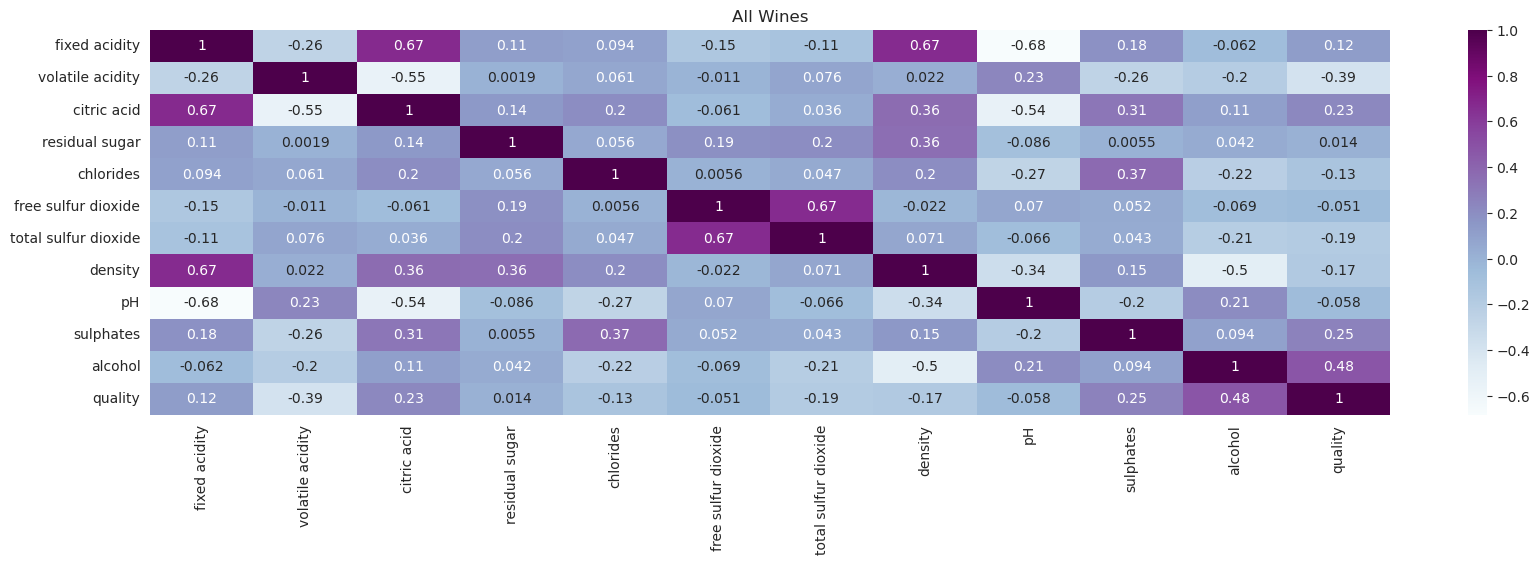

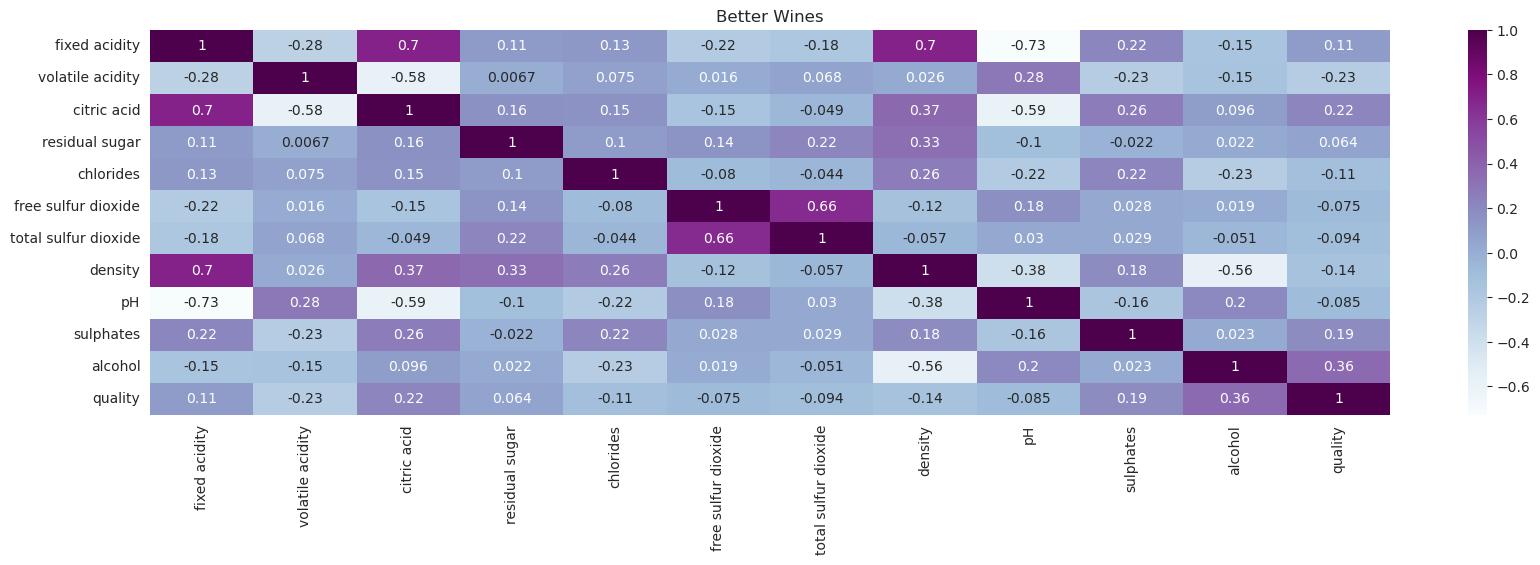

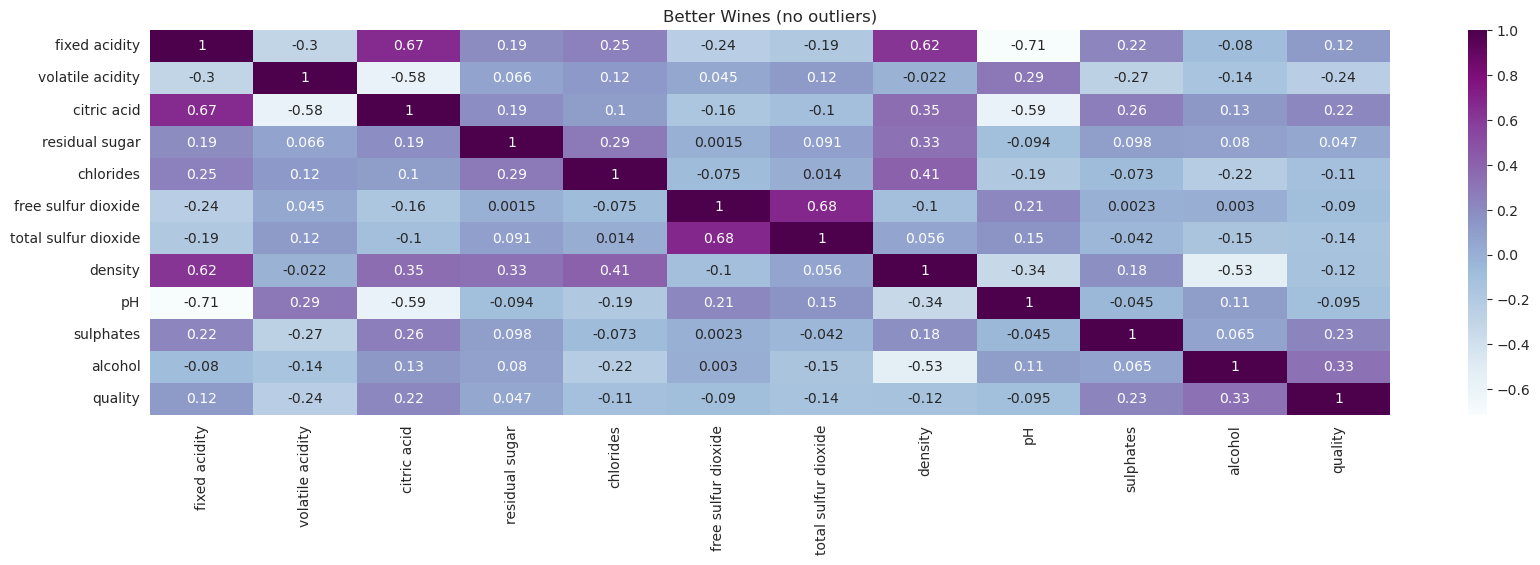

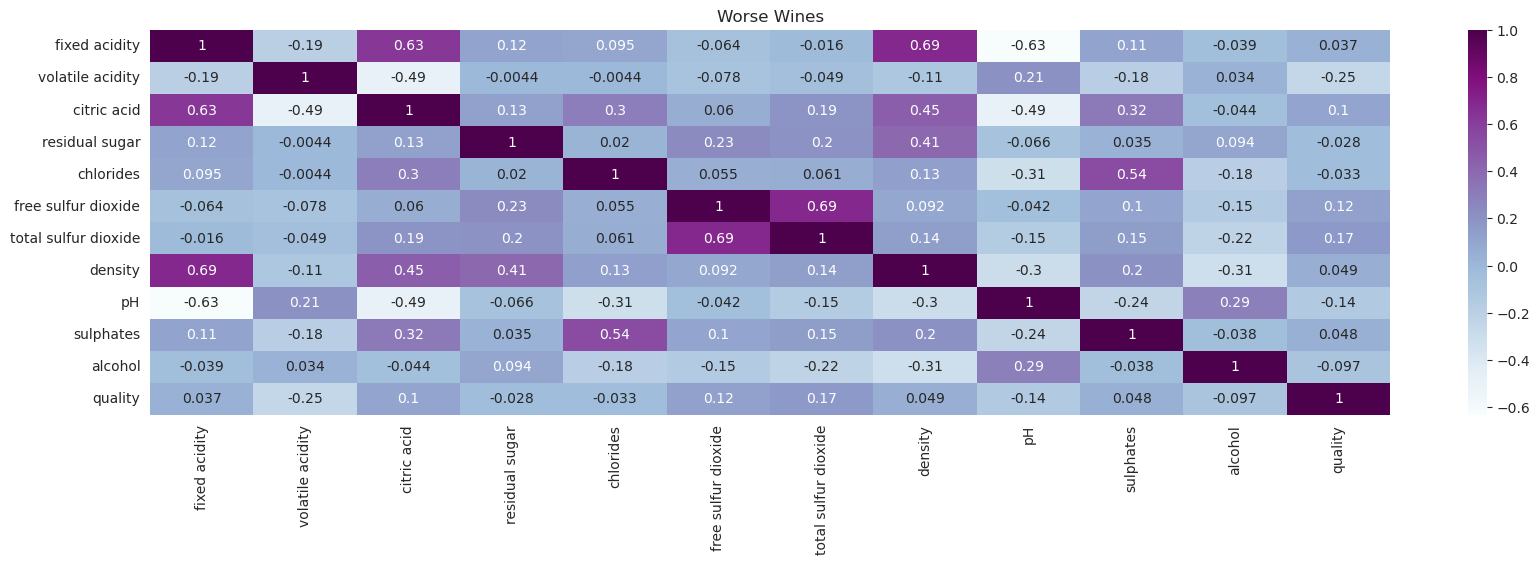

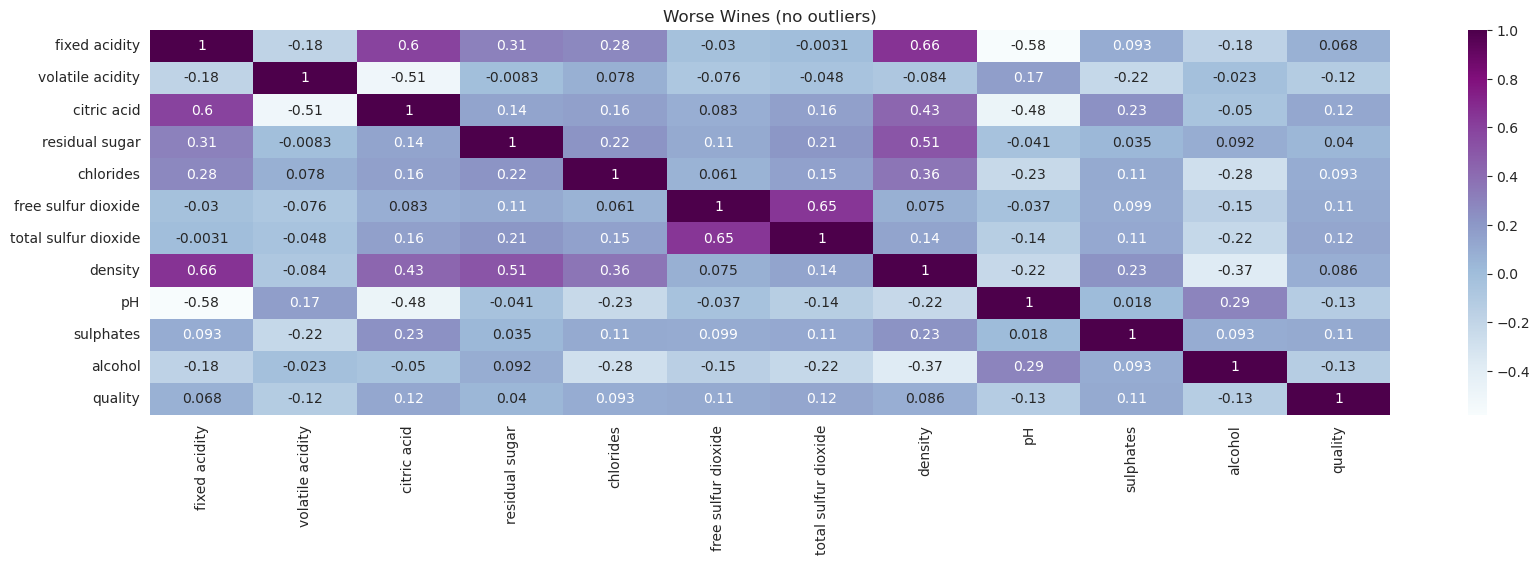

In [16]:
corr = df.corr(numeric_only=True)
better_corr = better.corr(numeric_only=True)
worse_corr = worse.corr(numeric_only=True)
better_clean_corr = better_clean.corr(numeric_only=True)
worse_clean_corr = worse_clean.corr(numeric_only=True)

"""
sns.heatmap(corr,annot=True).set_title("All Wines")
plt.show()
sns.heatmap(better_corr,annot=True).set_title("Better Wines")
plt.show()
sns.heatmap(better_clean_corr,annot=True).set_title("Better Wines (no outliers)")
plt.show()
sns.heatmap(worse_corr,annot=True).set_title("Worse Wines")
plt.show()
sns.heatmap(worse_clean_corr,annot=True).set_title("Worse Wines (no outliers)")
plt.show()
"""
listy = "BuPu"
sns.heatmap(corr,cmap=listy,annot=True).set_title("All Wines")
plt.show()
sns.heatmap(better_corr,cmap=listy,annot=True).set_title("Better Wines")
plt.show()
sns.heatmap(better_clean_corr,cmap=listy,annot=True).set_title("Better Wines (no outliers)")
plt.show()
sns.heatmap(worse_corr,cmap=listy,annot=True).set_title("Worse Wines")
plt.show()
sns.heatmap(worse_clean_corr,cmap=listy,annot=True).set_title("Worse Wines (no outliers)")
plt.show()


<h2 style="color:#B22222">Step VIII: Analyzing Attribute Influence on Wine Quality</h2>

A deeper exploration of how each wine attribute correlates with wine quality can help stakeholders make decisions related to wine production or marketing.

Procedure and Analysis:

*    **Sorting and Plotting Correlations:**
    The script sorts the correlations of all attributes with wine quality in descending order. This order emphasizes the attributes that have the most positive influence on wine quality at the top.

*    **Visualizing Influence via Bar Graphs:**
    Bar graphs provide a clear view of how each attribute correlates with wine quality for different wine groups. The length and direction of each bar signify the strength and type (positive or negative) of the correlation.
        * All Wines: Captures how each attribute correlates with the quality of all wines in the dataset.
        * Better Wines: Understands the influence of attributes on wines that surpass the median quality.
        * Better Wines (no outliers): Analyzes the influence without considering outliers for wines above the median quality.
        * Worse Wines: Inspects the correlation of attributes for wines below the median quality.
        * Worse Wines (no outliers): Analyzes without outliers to observe how different attributes correlate with the quality of wines below the median.

Observations:

* The top bars (positive or negative) in the graphs will indicate the attributes that have the strongest linear relationships with wine quality.
* Attributes with bars close to zero have weak or no linear relationships with wine quality.
* For the categories "Better Wines" and "Worse Wines", the key attributes influencing quality might differ. This insight can be particularly helpful for wine producers as they can adjust the composition based on the desired quality level.


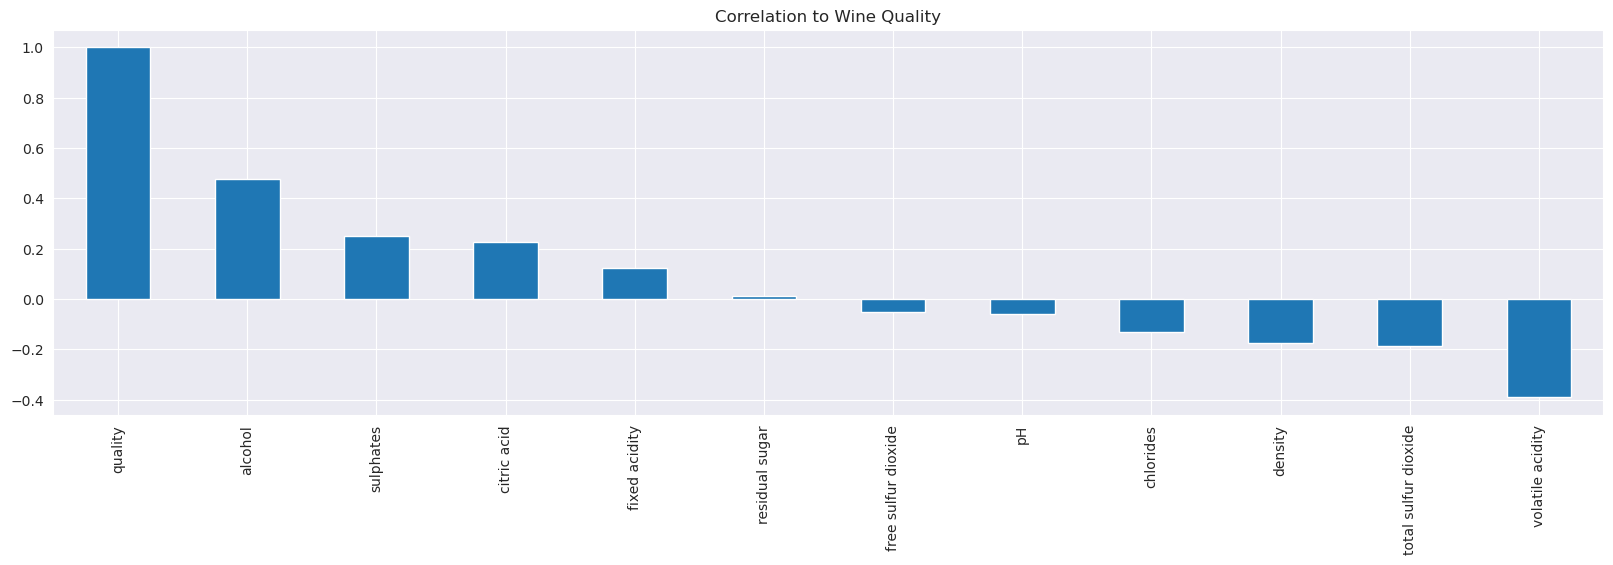

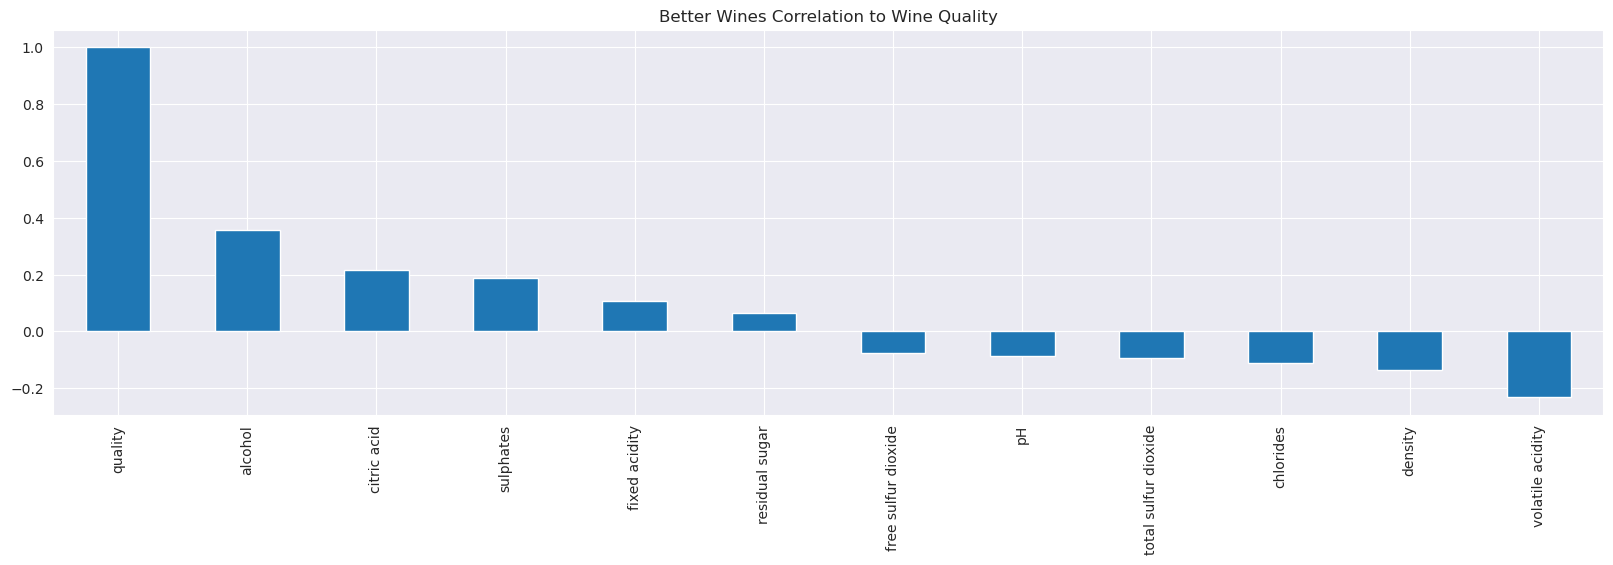

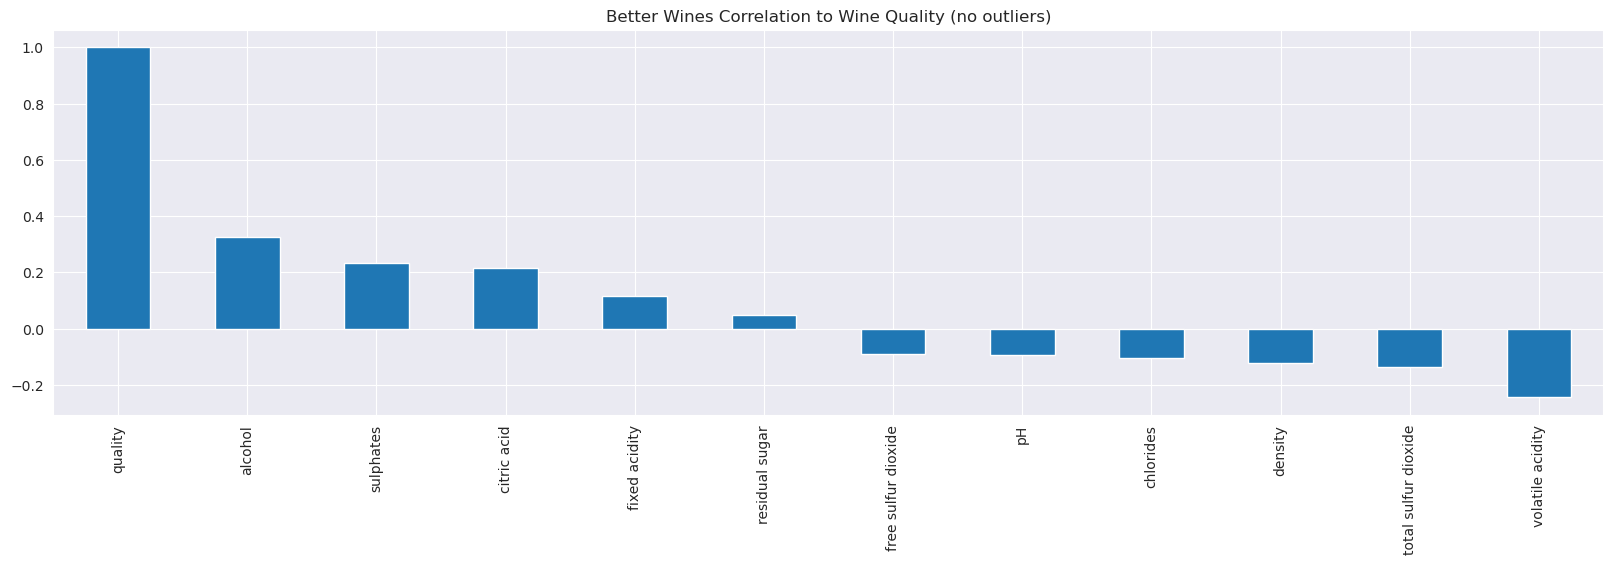

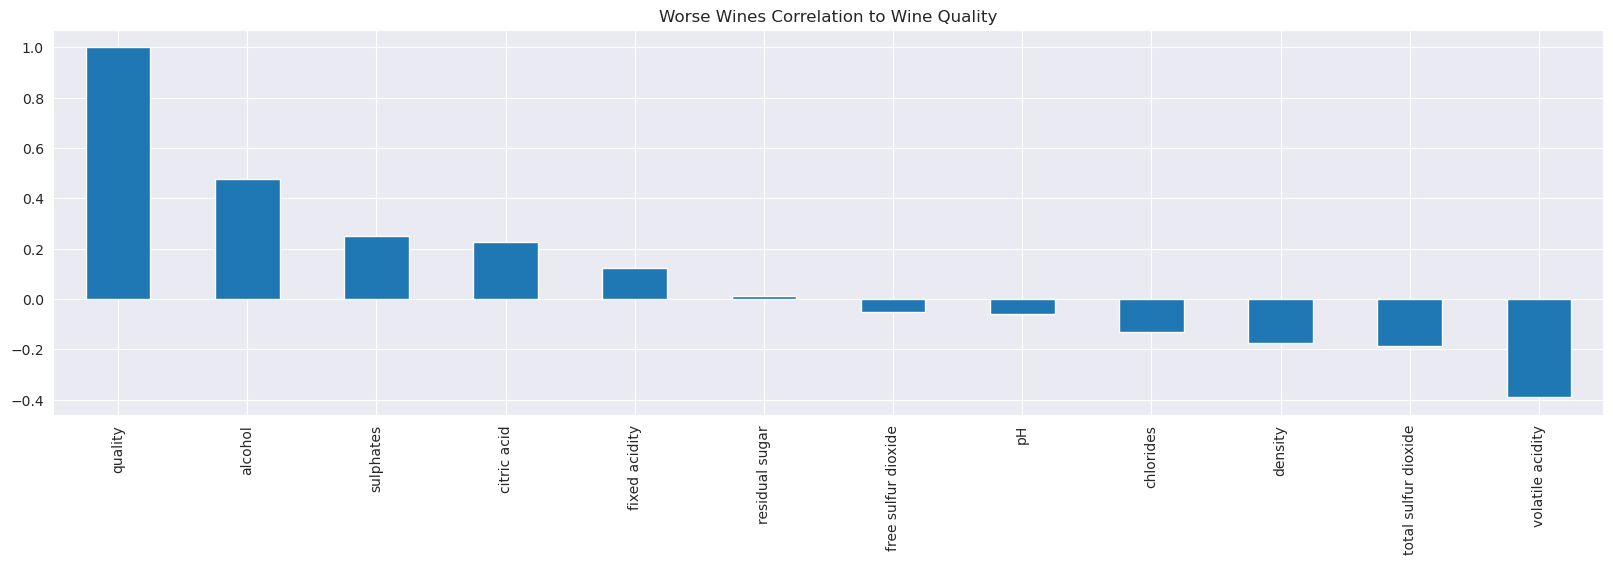

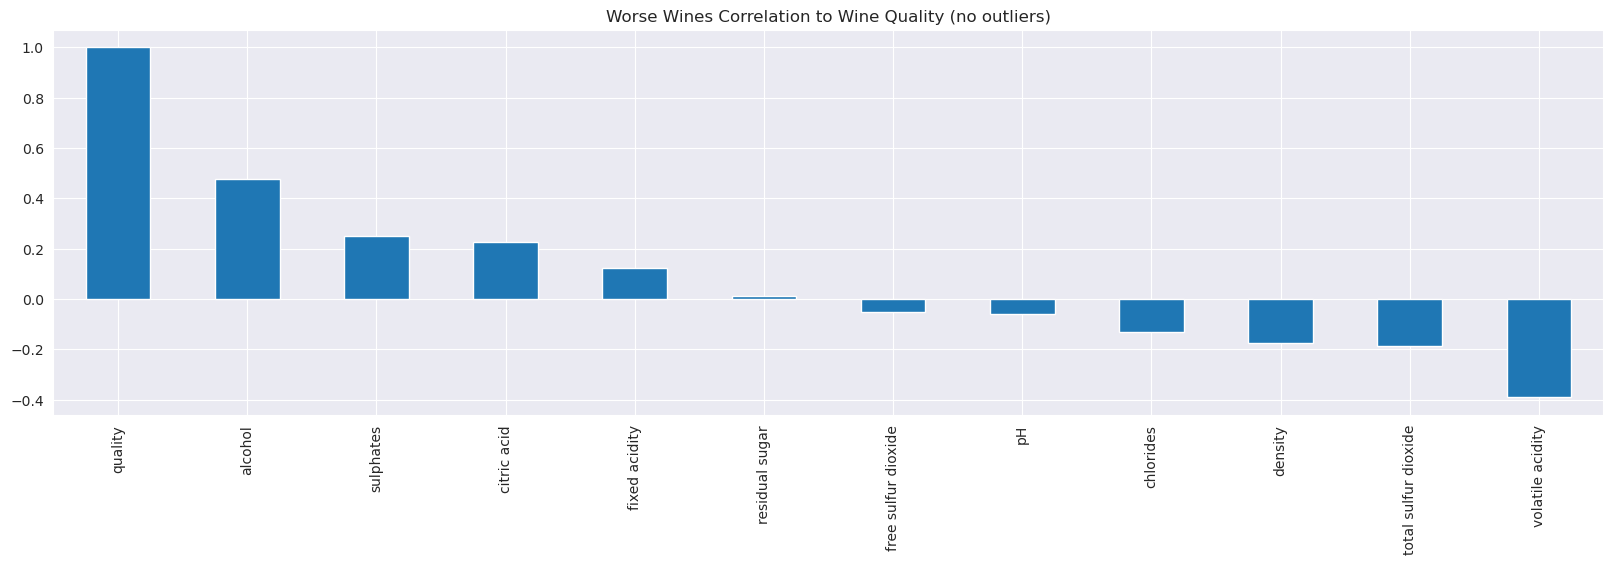

In [17]:
corr.sort_values(by='quality',ascending=False,inplace=True)
corr['quality'].plot(kind='bar').set_title('Correlation to Wine Quality')
plt.show()

better_corr.sort_values(by='quality',ascending=False,inplace=True)
better_corr['quality'].plot(kind='bar').set_title('Better Wines Correlation to Wine Quality')
plt.show()

better_clean_corr.sort_values(by='quality',ascending=False,inplace=True)
better_clean_corr['quality'].plot(kind='bar').set_title('Better Wines Correlation to Wine Quality (no outliers)')
plt.show()

worse_corr.sort_values(by='quality',ascending=False,inplace=True)
worse_corr['quality'].plot(kind='bar').set_title('Worse Wines Correlation to Wine Quality')
plt.show()

worse_clean_corr.sort_values(by='quality',ascending=False,inplace=True)
worse_clen_corr['quality'].plot(kind='bar').set_title('Worse Wines Correlation to Wine Quality (no outliers)')
plt.show()

<h2 style="color:#B22222">Step IX: Multiple Linear Regression Analysis</h2>

To understand how various wine attributes jointly influence its quality, a multiple linear regression analysis is conducted using the statsmodels library.

Procedure and Analysis:

*    **Defining the Model:**
    The quality of the wine (dependent_variable) is modelled as a function of various attributes (independent_variables), which include fixed acidity, volatile acidity, citric acid, and so forth.

*    **Adding a Constant:**
    A constant term is added to the regression model using sm.add_constant(). This is crucial for including an intercept in the regression equation.

*    **Fitting the Model:**
    The OLS (Ordinary Least Squares) method is applied to fit the model to the data.

*    **Printing the Summary:**
    The summary() method provides a comprehensive summary of the regression results, which includes coefficients, p-values, R-squared value, and other statistics.

### Key Outputs from the Regression Summary:

*    **R-squared:** This statistic provides the proportion of the variance in the dependent variable that is predictable from the independent variables. A value closer to 1 indicates that a large proportion of the variability in the outcome has been explained by the regression model.

*    **Coefficients:** These values indicate the mean change in the response variable for a one-unit change in the predictor variable, all other predictors being held constant.

*    **P-values:** They test the null hypothesis that a coefficient is equal to zero (no effect). A low p-value (typically ≤ 0.05) indicates that the predictor variable is statistically significant.

### Observations:

*    Variables with a p-value less than 0.05 are considered statistically significant in predicting wine quality. Those with a p-value higher than 0.05 might not be significant predictors.

*    Positive coefficients suggest that as the predictor variable increases, the response variable also increases. Conversely, negative coefficients suggest the opposite.

*    Depending on the R-squared value, we can gauge how well our model fits the data. If it's too low, it might be worthwhile to consider other predictors or look into more advanced regression methods.

This regression model helps in understanding the relative importance and influence of each wine attribute on its quality. It's a valuable tool for wine producers aiming to optimize wine production for higher quality ratings.

In [12]:
independent_variables = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', \
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', \
                         'pH', 'sulphates', 'alcohol']]
independent_variables = sm.add_constant(independent_variables)
dependent_variable= df['quality']
regression_model= sm.OLS(dependent_variable,independent_variables).fit()


print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.79e-145
Time:                        14:21:54   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

<h1 style="color:#B22222"> Wine Data Analysis Summary:</h1>

*    **Data Cleaning:**
    The dataset was first inspected for missing values, outliers, and other inconsistencies. Outliers were addressed by creating separate dataframes for clean data without outliers (better_clean and worse_clean).

*    **Descriptive Statistics:**
    Basic statistics such as mean, median, and standard deviation were computed to understand the central tendencies and dispersion of data attributes.

*    **Data Segmentation:**
    Wines were segmented based on their quality into three categories - better, worse, and all wines. This helped in drawing comparisons between the attributes of wines from different quality segments.

*    **Bar Charts for Variability:**
    Bar charts were plotted to compare the standard deviations and variances of various attributes across the wine categories. These visualizations provided insights into the variability of wine attributes within each quality segment.

*    **Correlation Analysis:**
    Heatmaps were generated to understand the pairwise correlation between all attributes for each wine category. Additionally, bar plots were used to display the correlation of each attribute with wine quality for each segment.

*    **Multiple Linear Regression:**
    A multiple linear regression model was constructed to understand the combined impact of wine attributes on its quality. This model provided insights into the relative importance of each attribute in predicting wine quality.



## Let's Connect

I'm always eager to take on new challenges and to collaborate with fellow data enthusiasts. Whether you're a recruiter looking for talent, a peer wanting to collaborate, or just someone curious about data, I'd love to connect.
  

  [LinkedIn](https://www.linkedin.com/in/miles-stripling)
  
  [Tableau](https://public.tableau.com/app/profile/miles.stripling?authMode=activationSuccess)

  miles.stripling@gmail.com